# Proyek Analisis Data: Bike
- **Nama:** [Gloria Rustama Simbolon]
- **Email:** [m291d4kx3285@bangkit.academy]
- **ID Dicoding:** [gloria_rustama]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat tabel day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat tabel hour 

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengubah tipe data pada kolom dteday

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [10]:
ssn_df = ["springer", "summer", "fall", "winter"]
day_df['season'] = day_df['season'].replace([1,2,3,4], ssn_df)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
holiday_df = day_df.iloc[:,[5,0,13,14,15]]
holiday_df

,holiday,instant,casual,registered,cnt
0,0,1,331,654,985
1,0,2,131,670,801
2,0,3,120,1229,1349
3,0,4,108,1454,1562
4,0,5,82,1518,1600
...,...,...,...,...,...
726,0,727,247,1867,2114
727,0,728,644,2451,3095
728,0,729,159,1182,1341
729,0,730,364,1432,1796


In [12]:
holiday_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

In [13]:
holiday_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt":  ["min", "max"]
})

instant  casual registered   cnt      
        nunique     sum        sum   min   max
holiday                                       
0           710  597658    2616586    22  8714
1            21   22359      56076  1000  7403

In [14]:
holiday_summary = holiday_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

dteday_df = day_df[['holiday', 'dteday']].drop_duplicates()
holiday_summary = holiday_summary.merge(dteday_df, on="holiday", how="left")

holiday_summary

,holiday,casual,registered,cnt,dteday
0,0,597658,2616586,3214244,2011-01-01
1,0,597658,2616586,3214244,2011-01-02
2,0,597658,2616586,3214244,2011-01-03
3,0,597658,2616586,3214244,2011-01-04
4,0,597658,2616586,3214244,2011-01-05
...,...,...,...,...,...
726,1,22359,56076,78435,2012-09-03
727,1,22359,56076,78435,2012-10-08
728,1,22359,56076,78435,2012-11-12
729,1,22359,56076,78435,2012-11-22


In [15]:
season_df = day_df.iloc[:,[2,0,1,13,14,15]]
season_df

,season,instant,dteday,casual,registered,cnt
0,springer,1,2011-01-01,331,654,985
1,springer,2,2011-01-02,131,670,801
2,springer,3,2011-01-03,120,1229,1349
3,springer,4,2011-01-04,108,1454,1562
4,springer,5,2011-01-05,82,1518,1600
...,...,...,...,...,...,...
726,springer,727,2012-12-27,247,1867,2114
727,springer,728,2012-12-28,644,2451,3095
728,springer,729,2012-12-29,159,1182,1341
729,springer,730,2012-12-30,364,1432,1796


In [16]:
ssn_df = ["springer", "summer", "fall", "winter"]
season_df['season'] = season_df['season'].replace([1,2,3,4], ssn_df)
season_df

C:\Users\advan\AppData\Local\Temp\ipykernel_1456\2885979241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['season'] = season_df['season'].replace([1,2,3,4], ssn_df)


,season,instant,dteday,casual,registered,cnt
0,springer,1,2011-01-01,331,654,985
1,springer,2,2011-01-02,131,670,801
2,springer,3,2011-01-03,120,1229,1349
3,springer,4,2011-01-04,108,1454,1562
4,springer,5,2011-01-05,82,1518,1600
...,...,...,...,...,...,...
726,springer,727,2012-12-27,247,1867,2114
727,springer,728,2012-12-28,644,2451,3095
728,springer,729,2012-12-29,159,1182,1341
729,springer,730,2012-12-30,364,1432,1796


In [17]:
season_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt":  ["min", "max"]
})

instant  casual registered   cnt      
         nunique     sum        sum   min   max
season                                         
fall         188  226091     835038  1115  8714
springer     181   60622     410726   431  7836
summer       184  203522     715067   795  8362
winter       178  129782     711831    22  8555

In [18]:
season_summary = season_df.groupby(by="season").agg({
    "instant": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

dteday_df = day_df[['season', 'dteday']].drop_duplicates()
dteday_df['season'] = dteday_df['season'].astype('str')
season_summary = season_summary.merge(dteday_df, on="season", how="left")

season_summary

,season,instant,casual,registered,cnt,dteday
0,fall,75482,226091,835038,1061129,2011-06-21
1,fall,75482,226091,835038,1061129,2011-06-22
2,fall,75482,226091,835038,1061129,2011-06-23
3,fall,75482,226091,835038,1061129,2011-06-24
4,fall,75482,226091,835038,1061129,2011-06-25
...,...,...,...,...,...,...
726,winter,87754,129782,711831,841613,2012-12-16
727,winter,87754,129782,711831,841613,2012-12-17
728,winter,87754,129782,711831,841613,2012-12-18
729,winter,87754,129782,711831,841613,2012-12-19


### Eksplorasi data all_df

In [19]:
season_summary.groupby(by="season").cnt.nunique().sort_values(ascending=False)
holiday_summary.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    1
1    1
Name: cnt, dtype: int64

In [20]:
all_df = pd.merge(
    left=season_summary,
    right=holiday_summary,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,season,instant,casual_x,registered_x,cnt_x,dteday,holiday,casual_y,registered_y,cnt_y
0,fall,75482,226091,835038,1061129,2011-06-21,0,597658,2616586,3214244
1,fall,75482,226091,835038,1061129,2011-06-22,0,597658,2616586,3214244
2,fall,75482,226091,835038,1061129,2011-06-23,0,597658,2616586,3214244
3,fall,75482,226091,835038,1061129,2011-06-24,0,597658,2616586,3214244
4,fall,75482,226091,835038,1061129,2011-06-25,0,597658,2616586,3214244


In [21]:
all_df.groupby(by="instant").agg({
    "instant": "nunique",
    "registered_x": "sum",
    "casual_x": "sum",
    "cnt_x": "sum"
})

,instant,registered_x,casual_x,cnt_x
instant,,,,
47546,1,74341406,10972582,85313988
56764,1,131572328,37448048,169020376
75482,1,156987144,42505108,199492252
87754,1,126705918,23101196,149807114


In [22]:
all_df.groupby(by=["dteday", "holiday"]).agg({
    "registered_x": "sum",
    "registered_y": "sum"
})

,,registered_x,registered_y
dteday,holiday,,
2011-01-01,0,410726,2616586
2011-01-02,0,410726,2616586
2011-01-03,0,410726,2616586
2011-01-04,0,410726,2616586
2011-01-05,0,410726,2616586
...,...,...,...
2012-12-27,0,410726,2616586
2012-12-28,0,410726,2616586
2012-12-29,0,410726,2616586


In [23]:
all_df.groupby(by=["dteday", "season"]).agg({
    "registered_x": "sum",
    "registered_y": "sum"
})

,,registered_x,registered_y
dteday,season,,
2011-01-01,springer,410726,2616586
2011-01-02,springer,410726,2616586
2011-01-03,springer,410726,2616586
2011-01-04,springer,410726,2616586
2011-01-05,springer,410726,2616586
...,...,...,...
2012-12-27,springer,410726,2616586
2012-12-28,springer,410726,2616586
2012-12-29,springer,410726,2616586


In [24]:
all_df

,season,instant,casual_x,registered_x,cnt_x,dteday,holiday,casual_y,registered_y,cnt_y
0,fall,75482,226091,835038,1061129,2011-06-21,0,597658,2616586,3214244
1,fall,75482,226091,835038,1061129,2011-06-22,0,597658,2616586,3214244
2,fall,75482,226091,835038,1061129,2011-06-23,0,597658,2616586,3214244
3,fall,75482,226091,835038,1061129,2011-06-24,0,597658,2616586,3214244
4,fall,75482,226091,835038,1061129,2011-06-25,0,597658,2616586,3214244
...,...,...,...,...,...,...,...,...,...,...
726,winter,87754,129782,711831,841613,2012-12-16,0,597658,2616586,3214244
727,winter,87754,129782,711831,841613,2012-12-17,0,597658,2616586,3214244
728,winter,87754,129782,711831,841613,2012-12-18,0,597658,2616586,3214244
729,winter,87754,129782,711831,841613,2012-12-19,0,597658,2616586,3214244


In [25]:
all_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana musim mempengaruhi jumlah penggunaan sepeda?

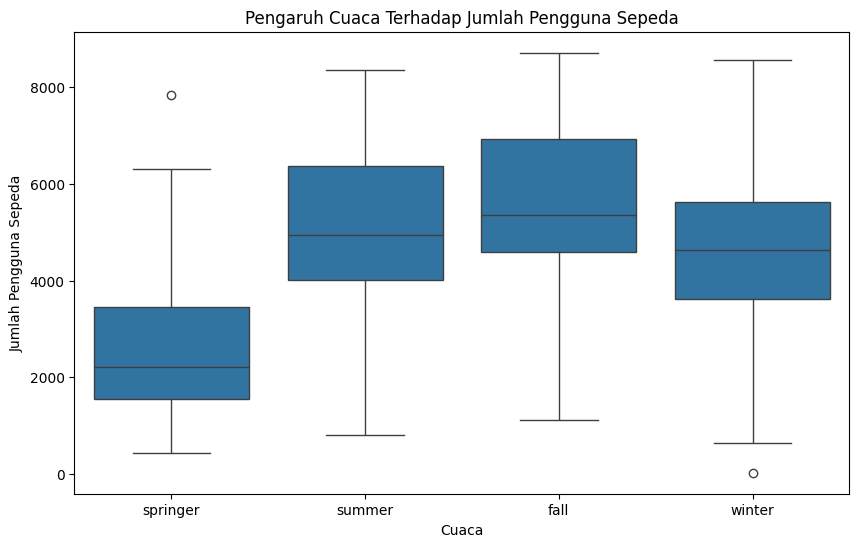

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=season_df)
plt.title('Pengaruh Cuaca Terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2: Apakah ada pola penggunaan sepeda yang berbeda antara pengguna casual dan pengguna terdaftar?

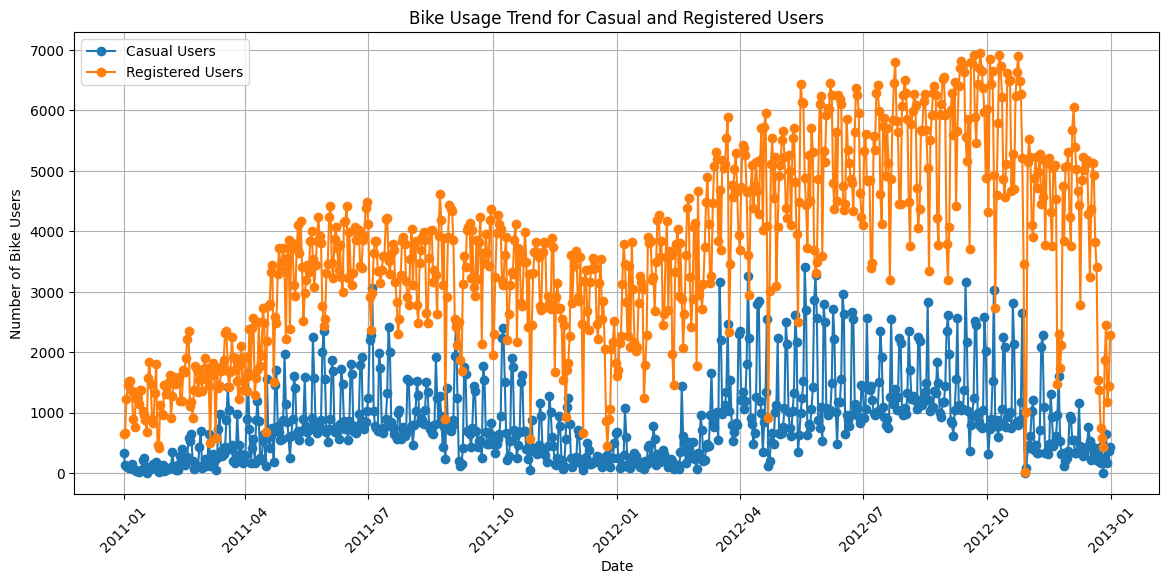

In [27]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize=(14, 6))
plt.plot(day_df['dteday'], day_df['casual'], label='Casual Users', marker='o', linestyle='-')
plt.plot(day_df['dteday'], day_df['registered'], label='Registered Users', marker='o', linestyle='-')
plt.title('Bike Usage Trend for Casual and Registered Users')
plt.xlabel('Date')
plt.ylabel('Number of Bike Users')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Dengan melihat perbedaan dalam median dan interquartile range (IQR) antara musim-musim, dapat dilihat bahwa pola penggunaan sepeda berubah seiring perubahan musim. Dari grafik yang ditunjukan musim gugur (fall) memiliki jumlah penggunaan sepeda yang tinggi, dikarenakan musim gugur seringkali memiliki cuaca yang lebih sejuk dan nyaman dibandingkan musim panas yang panas dan musim dingin yang dingin. Selain itu seringkali disertai perubahan warna daun dan pemandangan alam yang spektakuler. Musim gugur juga biasanya menandai awal dari periode perayaan dan festival. 
Kemudian musim semi (springer) memiliki jumlah penggunaan sepeda yang rendah, dikarenakan musim semi seringkali ditandai dengan cuaca yang tidak stabil yang membuat orang enggan untuk bersepeda. Musim semi juga sering menandai awal dari kembalinya rutinitas sehari-hari setelah musim dingin. 

- Conclution pertanyaan 2: 
Terdapat perbedaan pola penggunaan sepeda antara pengguna casual dan pengguna registered. Pada beberapa titik waktu, jumlah pengguna casual mungkin lebih tinggi daripada jumlah pengguna registered, dan sebaliknya. Misalnya, terdapat peningkatan penggunaan sepeda di musim gugur (fall) dan penurunan pada musim spring. Perbedaan pola penggunaan sepeda juga mungkin lebih menonjol pada hari-hari tertentu. Misalnya, pengguna casual mungkin lebih aktif saat akhir pekan atau pada acara khusus, sementara pengguna registered mungkin lebih konsisten dalam penggunaan sepanjang minggu.